# Python-Oracle Anbindung

## Benötigte Pakete:

   
    - Oracle-Pandas: 'pip install pandas-oracle', https://github.com/cwade/pandas_oracle
    - cx_Oracle: wird über pandas-oracle installiert
    - Seaborn, Pandas, Numpy, etc 


## HU-VPN  aktivieren oder in HU-Netzwerk (WLAN) einloggen.

Anleitungen:
https://www.cms.hu-berlin.de/de/dl/netze/vpn


## Verbindungsdaten: 
Die Verbindungsdaten werden in config.yml gespeichert. Die Datein *muss* im gleichen Ordner liegen.

In [4]:
import pandas_oracle.tools as pt
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Verbindungsaufbau:

In [2]:
def run_query(query) :
    ## opening conn
    conn = pt.open_connection("config.yml")

    try:
        ## passing the conn object to the query_to_df
        df1 = pt.query_to_df(query, conn, 10000)
        return df1
    except Exception as e:
        print("An exception occurred")
        print(str(e))
    finally:
        ## close connection
        pt.close_connection(conn)

*Wichtig: die Verbindungs zur DB muss geschlossen werden, wenn ein Fehler auftritt.*

# 1. Beispielanfrage

In [6]:
query = "SELECT % FROM all_tables"
df = run_query(query)
df

,TABLE_NAME
0,AW$AWREPORT
1,AW$AWXML
2,AW$AWCREATE10G
3,AW$AWCREATE
4,AW$AWMD
...,...
101,SDO_CS_CONTEXT_INFORMATION
102,SDO_TOPO_TRANSACT_DATA
103,SDO_TOPO_RELATION_DATA
104,SDO_TOPO_DATA$


,TABLE_NAME
90,SDO_GR_MOSAIC_3
91,SDO_GR_PARALLEL
92,SDO_GR_RDT_1
93,SDO_GEOR_PLUGIN_REGISTRY
94,SDO_WS_CONFERENCE
95,SDO_WS_CONFERENCE_RESULTS
96,SDO_WS_CONFERENCE_PARTICIPANTS
97,SDO_WFS_LOCAL_TXNS
98,SDO_TIN_PC_SEQ
99,SDO_TIN_PC_SYSDATA_TABLE


In [28]:
query = """
select  100 * s1/alle as airline_delay, 100 * s2/alle as late_aircraft_delay, 100 * s3/alle as weather_delay,  100 * s4/alle as security_delay FROM
    (select s1 + s2 + s3 + s4 as alle, s1, s2, s3, s4 FROM
        (select
        sum(airline_delay) as s1, sum(late_aircraft_delay) as s2,
        sum(weather_delay) as s3, sum(security_delay) as s4 
        from DELAYS ))
"""
df = run_query(query)
df

,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SECURITY_DELAY
0,41.409314,51.890438,6.530076,0.170172


In [22]:
query = """
select
sum(airline_delay) as s1, sum(late_aircraft_delay) as s2,
sum(weather_delay) as s3, sum(security_delay) as s4,
s1 + s2 + s3 + s4
from DELAYS 
"""
df = run_query(query)
df

An exception occurred
ORA-00904: "S4": invalid identifier


## Visualisierung

In [ ]:
df.columns

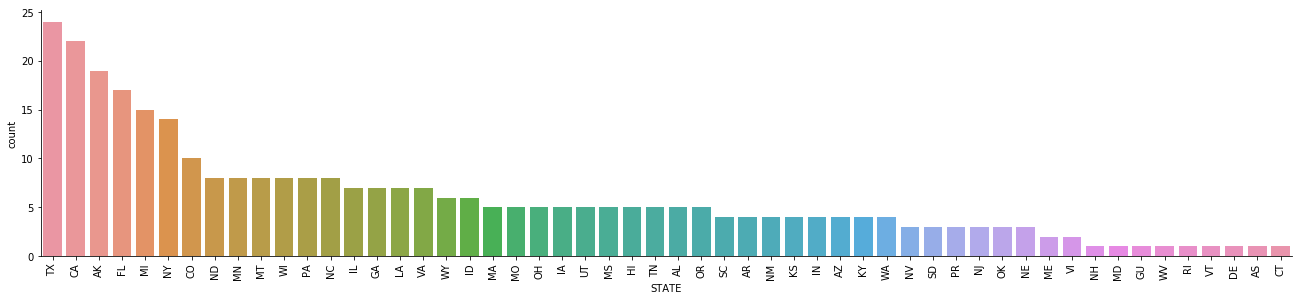

In [22]:
# Vorsicht: hier wird aggregiert. Das wollen wir aber selbst in SQL machen!
# Siehe nächste Anfrage
g=sns.catplot(x='STATE',
            kind='count',
            height=4, 
            aspect=4.5,
            data=df,
            order=df['STATE'].value_counts().index)
_=g.set_xticklabels(rotation=90)

# 2. Beispielanfrage

In [23]:
query2 = "select state, count(*) as anz from airport GROUP BY STATE"
df = run_query(query2)
df

,STATE,ANZ
0,NJ,3
1,AK,19
2,SD,3
3,MN,8
4,OK,3
5,AS,1
6,WV,1
7,ND,8
8,CA,22
9,WY,6


## Visualisierung

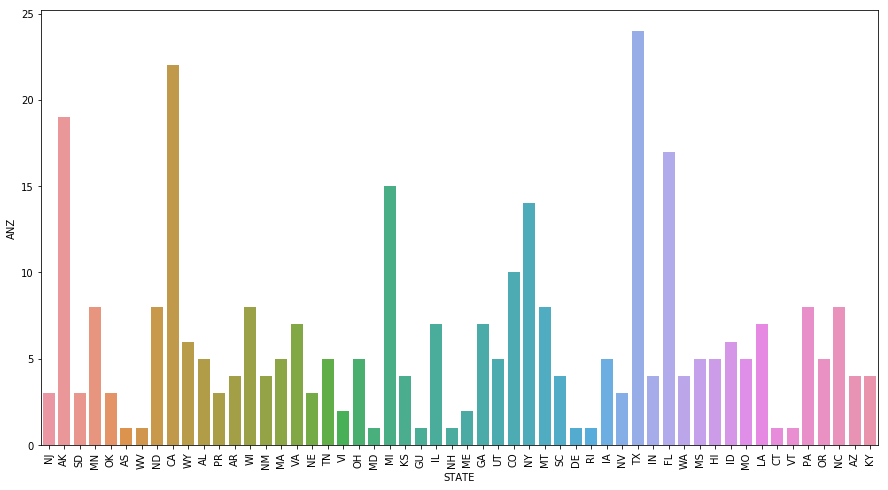

In [24]:
plt.figure(figsize=(15,8))
g=sns.barplot(x='STATE',
            y='ANZ',
            data=df)
_=g.set_xticklabels(df['STATE'], rotation=90)


In [25]:
df

,STATE,ANZ
0,NJ,3
1,AK,19
2,SD,3
3,MN,8
4,OK,3
5,AS,1
6,WV,1
7,ND,8
8,CA,22
9,WY,6


In [29]:
query = """
select  100 * s1/alle as airline_delay, 100 * s2/alle as late_aircraft_delay, 100 * s3/alle as weather_delay,  100 * s4/alle as security_delay FROM
    (select s1 + s2 + s3 + s4 as alle, s1, s2, s3, s4 FROM
        (select
        sum(airline_delay) as s1, sum(late_aircraft_delay) as s2,
        sum(weather_delay) as s3, sum(security_delay) as s4 
        from DELAYS ))
"""
df = run_query(query)
df

,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SECURITY_DELAY
0,41.409314,51.890438,6.530076,0.170172


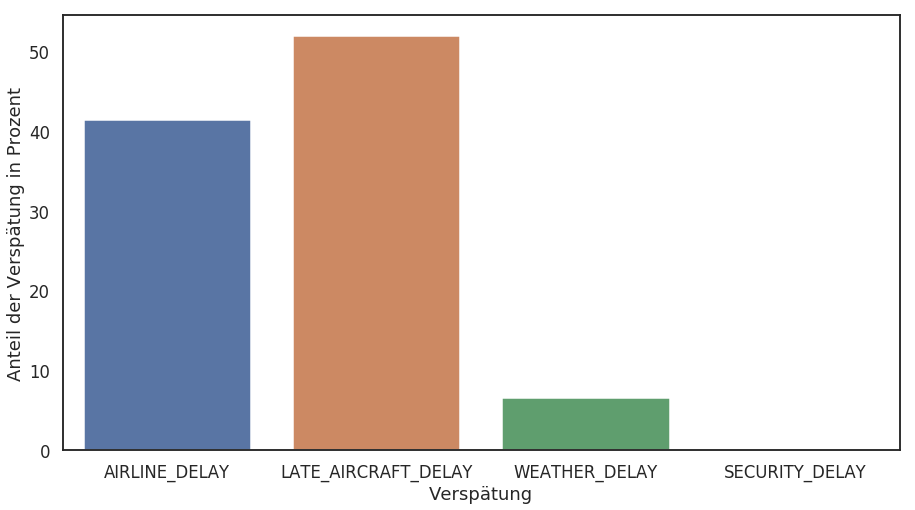

In [46]:
plt.figure(figsize=(15,8))


sns.set_theme(style="white", context="talk")
graph = sns.barplot(data=df)

graph.set(ylabel="Anteil der Verspätung in Prozent", xlabel="Verspätung")
plt.savefig("./aufgabe1.png")


In [ ]:
query = """
select  100 * s1/alle as airline_delay, 100 * s2/alle as late_aircraft_delay, 100 * s3/alle as weather_delay,  100 * s4/alle as security_delay FROM
    (select s1 + s2 + s3 + s4 as alle, s1, s2, s3, s4 FROM
        (select
        sum(airline_delay) as s1, sum(late_aircraft_delay) as s2,
        sum(weather_delay) as s3, sum(security_delay) as s4 
        from DELAYS ))
"""
df = run_query(query)
df

## Aufgabe 9

In [133]:
query = """
SELECT airline_iata, 
sum(delay5) / count(airline_iata) * 100, 
sum(delay5_45) / count(airline_iata) * 100, 
sum(delay45) / count(airline_iata) * 100

FROM
    (SELECT airline_iata, sum_delay,
    CASE
        WHEN sum_delay < 5  OR  sum_delay is NULL THEN 1
        ELSE 0
    END AS delay5,
    CASE
        WHEN  45 > sum_delay AND sum_delay > 5 THEN 1
        ELSE 0
    END AS delay5_45,
    CASE
        WHEN  45 < sum_delay THEN 1
        ELSE 0
    END AS delay45
    FROM
        (SELECT airline_iata,
        air_system_delay + security_delay + airline_delay + late_aircraft_delay + weather_delay as sum_delay
        FROM delays))
GROUP BY airline_iata
"""
df = run_query(query)
df

,AIRLINE_IATA,SUM(DELAY5)/COUNT(AIRLINE_IATA)*100,SUM(DELAY5_45)/COUNT(AIRLINE_IATA)*100,SUM(DELAY45)/COUNT(AIRLINE_IATA)*100
0,EV,80.526899,10.639640,8.656739
1,AS,86.900680,8.745745,4.235894
2,AA,81.485878,10.861361,7.481956
3,US,81.607327,11.811891,6.413205
4,F9,72.946153,14.374811,12.399831
5,VX,80.695973,11.091621,8.005103
6,WN,80.630740,11.917943,7.259498
7,DL,85.988012,8.316830,5.577831
8,B6,77.498113,12.037041,10.249454
9,HA,88.496359,9.108953,2.307582


In [145]:
 pd.set_option('display.max_rows', df.shape[0]+1)

## Aufgabe 8

In [173]:
query = """
SELECT route, airline_count FROM
    (SELECT
    route, count(DISTINCT airline_iata) as airline_count FROM
        (SELECT   airline_iata, 
        origin_airport || ' ' || destination_airport as route
        FROM delays)
    GROUP BY route )
WHERE airline_count > 6

"""
df = run_query(query)
df #alle über 7



,ROUTE,AIRLINE_COUNT
0,MSP DEN,7
1,PHX SEA,7
2,ORD ATL,8
3,ORD PHL,7
4,LAS LAX,7
5,ORD MSP,7
6,SEA PHX,7
7,DEN MSP,7
8,LAX LAS,7
9,MSP ORD,7


## 

In [170]:
query = """
SELECT ORIGIN_CITY, c FROM
(SELECT  ORIGIN_CITY, count(DISTINCT origin_airport) as c
    FROM flight GROUP BY ORIGIN_CITY)
WHERE c > 1
"""
df = run_query(query)
df

,ORIGIN_CITY,C
0,Columbia,2
1,Portland,2
2,Jacksonville,2
3,San Diego,2
4,Springfield,2
5,New York,2
6,Rochester,2
7,Jackson,2
8,Chicago,2
9,Albany,2


In [172]:
query = """
SELECT ORIGIN_STATE, c FROM
(SELECT  ORIGIN_STATE, count(DISTINCT origin_airport) as c
    FROM flight GROUP BY ORIGIN_STATE)
WHERE c > 1
ORDER BY c DESC
"""
df = run_query(query)
df

,ORIGIN_STATE,C
0,TX,24
1,CA,22
2,AK,19
3,FL,17
4,MI,15
5,NY,14
6,CO,10
7,NC,8
8,ND,8
9,MN,8


In [167]:
query = """
SELECT  *
    FROM flight
"""
df = run_query(query)
df

,FLIGHT_ID,FLIGHT_NUMBER,DISTANCE,SCHEDULED_TIME,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE,ORIGIN_IATA,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_IATA,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,1,2336,1199,173.0,0523,0030,DEN,Denver International Airport,Denver,CO,USA,3985841.0,-10466700.0,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,3364044.0,-8442694.0
1,2,2440,1399,189.0,0549,0040,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,4744898.0,-12230931.0,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,4488055.0,-9321692.0
2,3,5184,1195,193.0,0953,0540,SLC,Salt Lake City International Airport,Salt Lake City,UT,USA,4078839.0,-11197777.0,IAH,George Bush Intercontinental Airport,Houston,TX,USA,2998047.0,-9533972.0
3,4,1660,1431,210.0,1130,0600,SMF,Sacramento International Airport,Sacramento,CA,USA,3869542.0,-12159077.0,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,3289595.0,-9703720.0
4,5,1540,761,124.0,0904,0600,OKC,Will Rogers World Airport,Oklahoma City,OK,USA,3539309.0,-9760073.0,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,3364044.0,-8442694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493717,493718,3453,255,70.0,1930,1820,BWI,Baltimore-Washington International Airport,Baltimore,MD,USA,3917540.0,-7666820.0,RDU,Raleigh-Durham International Airport,Raleigh,NC,USA,3587764.0,-7878747.0
493718,493719,3871,236,60.0,1935,1835,LAX,Los Angeles International Airport,Los Angeles,CA,USA,3394254.0,-11840807.0,LAS,McCarran International Airport,Las Vegas,NV,USA,3608036.0,-11515233.0
493719,493720,1430,377,80.0,2030,1910,BWI,Baltimore-Washington International Airport,Baltimore,MD,USA,3917540.0,-7666820.0,MHT,Manchester-Boston Regional Airport,Manchester,NH,USA,4293452.0,-7143706.0
493720,493721,918,834,161.0,2226,1945,LAX,Los Angeles International Airport,Los Angeles,CA,USA,3394254.0,-11840807.0,PDX,Portland International Airport,Portland,OR,USA,4558872.0,-12259750.0


In [168]:
df.columns

Index(['FLIGHT_ID', 'FLIGHT_NUMBER', 'DISTANCE', 'SCHEDULED_TIME',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'ORIGIN_IATA',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_COUNTRY',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_IATA',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'DESTINATION_COUNTRY', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE'],
      dtype='object')